In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 5,5

In [2]:
def f(x):
    return abs(np.exp(1/x) * np.sin(x)) * 60

In [21]:
X_train = np.array([2, 5, 20, 40, 60]).reshape(-1, 1)
y_train = f(X_train)

X_real = np.linspace(2,60,100).reshape(-1,1)
y_real = f(X_real)

In [44]:
X_test = np.array([30, 37, 42]).reshape(-1, 1)
y_test = f(X_test)

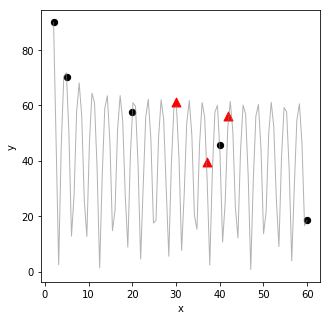

In [46]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train, y_train, c ='black', s=40)
plt.plot(X_real, y_real, 'grey', linewidth=1,alpha=0.6)
plt.scatter(X_test, y_test, c ='red', marker = "^", s=80)

# 1. Linear regression fit

In [47]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
reg.coef_

array([[-1.05556354]])

In [49]:
y_pred = reg.predict(X_train)

In [50]:
r2_score(y_train, y_pred)

0.9361816064879869

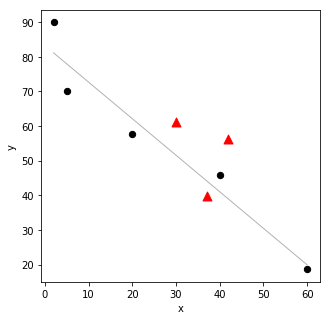

In [51]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train, y_train, c ='black', s=40)
plt.plot(X_train, y_pred, 'grey', linewidth=1,alpha=0.6)
plt.scatter(X_test, y_test, c ='red', marker = "^", s=80)
# plt.plot(X_real, y_real, c = 'grey', alpha=0.2)

# 3. polynomial model

In [52]:
from sklearn.preprocessing import PolynomialFeatures

degree 3


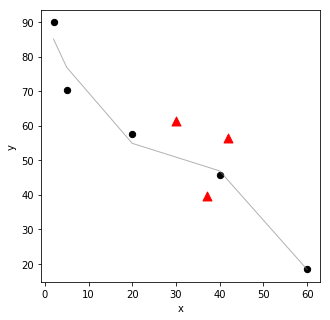

In [53]:
print ("degree 3")
poly = PolynomialFeatures(degree=3)
X_train_ = poly.fit_transform(X_train)
reg_ = linear_model.LinearRegression()
reg_.fit(X_train_, y_train)
y_pred_ = reg_.predict(X_train_)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train, y_train, c ='black', s=40)
plt.plot(X_train, y_pred_, 'grey', linewidth=1,alpha=0.6)
plt.scatter(X_test, y_test, c ='red', marker = "^", s=80)
# plt.plot(X_real, y_real, c = 'grey', alpha=0.2)

degree 4


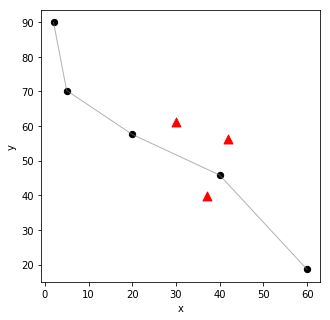

In [54]:
print ("degree 4")
poly = PolynomialFeatures(degree=4)
X_train_ = poly.fit_transform(X_train)
reg_ = linear_model.LinearRegression()
reg_.fit(X_train_, y_train)
y_pred_ = reg_.predict(X_train_)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train, y_train, c ='black', s=40)
plt.plot(X_train, y_pred_, 'grey', linewidth=1,alpha=0.6)
plt.scatter(X_test, y_test, c ='red', marker = "^", s=80)
# plt.plot(X_real, y_real, c = 'grey', alpha=0.2)

# 4. Gaussian regression fit

In [56]:
# from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
# X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X_train, y_train)
gpr.score(X_train, y_train) 

0.9351801406357332

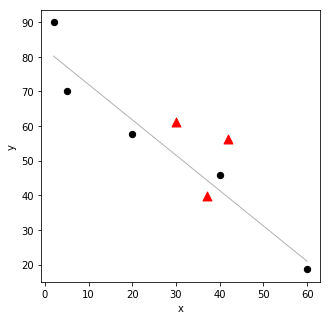

In [57]:
y_pred_gp = gpr.predict(X_train, return_std=False) 
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train, y_train, c ='black', s=40)
plt.plot(X_train, y_pred_gp, 'grey', linewidth=1,alpha=0.6)
plt.scatter(X_test, y_test, c ='red', marker = "^", s=80)
#plt.plot(X_real, y_real, c = 'grey', alpha=0.2)

In [ ]:
# gaussian process function prediction

In [58]:
def kernel(x1,x2,length_scale=1): 
    # use the fast implementation
    sq_dist2 = np.sum(x1**2, 1).reshape(-1,1) + np.sum(x2**2, 1) - 2 * np.dot(x1,x2.T) 
    # print (sqdist.shape)
    return np.exp(- 1 * sq_dist2/ (2 * length_scale))

def gp_process(Xtrain, ytrain, n=20, length_scale = 2, sigma = 1e-6):
    x_min = np.min(Xtrain)
    x_max = np.max(Xtrain)
    Xtest = np.linspace(x_min, x_max, n).reshape(-1,1)
    
    ############# GP algorithm start #############
    K = kernel(Xtrain, Xtrain, length_scale)
    K_s = kernel(Xtrain, Xtest, length_scale)
    K_s_t = kernel(Xtest, Xtrain, length_scale) # transpose of K_s
    K_ss = kernel(Xtest, Xtest, length_scale)


    L = np.linalg.cholesky(K + sigma*np.eye(len(Xtrain)))
    beta= np.linalg.solve(L,ytrain)
    L_T = np.matrix.transpose(L)
    alpha = np.linalg.solve(L_T, beta)
    
    f_mean = np.dot(K_s_t, alpha)

    v = np.linalg.solve(L, K_s)
    f_V = np.diag(K_ss) - np.sum(v**2, axis=0)
    f_stdv = np.sqrt(f_V)
    ############# GP algorithm end ###############
    
    plt.scatter(Xtrain, ytrain, c ='black', s=40)
    plt.plot(Xtest, f_mean, 'grey', linewidth=1,alpha=0.6)
    plt.scatter(X_test, y_test, c ='red', marker = "^", s=80)
    plt.xlabel('x')
    plt.ylabel('y')
    # plt.gca().fill_between(Xtest.flat, -1, acq, color="green",alpha=0.6)
    # plt.plot(Xtest,acq,'green')
    plt.show()

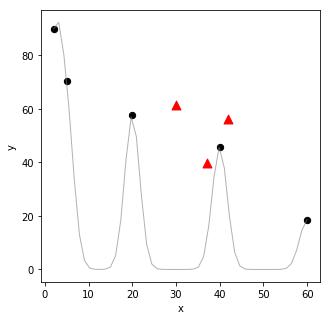

In [59]:
gp_process(X_train, y_train, n=50, length_scale = 3)

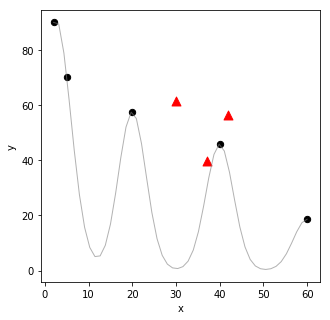

In [60]:
gp_process(X_train, y_train, n=50, length_scale = 10)

# bias-variance trade off

# 1. OLS

In [298]:
def f_ols(x):
    return 5*x - 3 + 10*np.random.normal(5,3,1) 

train_size = 80
test_size = 20
X_train = np.sort(np.random.normal(100,80,800)).reshape(-1,1)
y_train = np.array([f_ols(x) for x in X_train])
X_test = np.sort(np.random.normal(100,80,200)).reshape(-1,1)
y_test = np.array([f_ols(x) for x in X_test])

In [299]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [300]:
def evaluate(X_train, X_test, reg, y_train, y_test,print_results=True):
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    train_loss = mean_squared_error(y_train, y_pred_train)
    test_loss = mean_squared_error(y_test, y_pred_test)
    if print_results:
        print ("training loss mean squared error is %.2f"%train_loss)
        print ("testing loss mean squared error is %.2f"%test_loss)
    return (train_loss, test_loss)

In [301]:
evaluate(X_train, X_test, reg, y_train, y_test)

training loss mean squared error is 786.83
testing loss mean squared error is 867.83


(786.833885589578, 867.8288131517916)

In [304]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
train_loss = mean_squared_error(y_train, y_pred_train)
test_loss = mean_squared_error(y_test, y_pred_test)

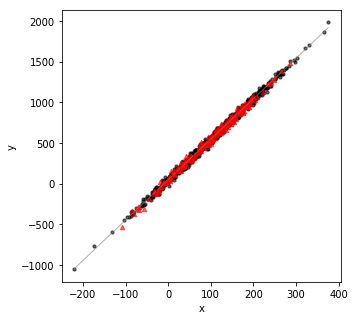

In [305]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train, y_train, c ='black', s=10, alpha=0.6)
plt.plot(X_train, y_pred_train, 'grey', linewidth=1,alpha=0.6)
plt.scatter(X_test, y_test, c ='red', marker = "^", s=20,alpha=0.6)

## 2 polynormial degree

In [318]:
def poly_degree(degree, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    reg_poly = linear_model.LinearRegression()
    reg_poly.fit(X_train_poly, y_train)
    
    print ("loss of degree %d"%degree)
    return evaluate(X_train_poly, X_test_poly, reg_poly, y_train, y_test)

In [327]:
degrees = range(1,3)
train_losses = []
test_losses = []
for degree in degrees:
    loss = poly_degree(degree)
    train_losses.append(loss[0])
    test_losses.append(loss[1])

loss of degree 1
training loss mean squared error is 786.83
testing loss mean squared error is 867.83
loss of degree 2
training loss mean squared error is 785.29
testing loss mean squared error is 873.93


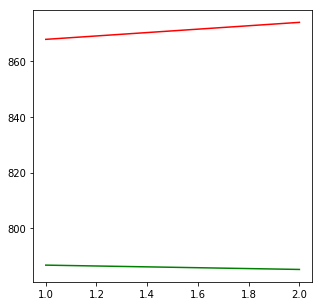

In [328]:
plt.plot(degrees,train_losses, c='g')
plt.plot(degrees,test_losses,c='r')

In [320]:
poly_degree(1)

loss of degree 1
training loss mean squared error is 786.83
testing loss mean squared error is 867.83


(786.833885589578, 867.8288131517905)

In [319]:
poly_degree(2)

loss of degree 2
training loss mean squared error is 785.29
testing loss mean squared error is 873.93


(785.2854938446548, 873.9279135420968)

In [322]:
poly_degree(3)

loss of degree 3
training loss mean squared error is 785.28
testing loss mean squared error is 874.16


(785.2810370583169, 874.1569968841947)